<a href="https://colab.research.google.com/github/kclassie/HSE_Open_Data_Cource/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Анализ датасета

Для анализа используем датасеты с Портала открытых данных Москвы о наиболее популярных именах для новорожденных: 
- мальчиков: https://data.mos.ru/opendata/7704111479-svedeniya-o-naibolee-populyarnyh-mujskih-imenah-sredi-novorojdennyh


- девочек: https://data.mos.ru/opendata/7704111479-svedeniya-o-naibolee-populyarnyh-jenskih-imenah-sredi-novorojdennyh



In [ ]:
import pandas as pd
import numpy as np
import matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Датасеты разные/moscow_names.csv')

In [ ]:
df

In [ ]:
df.dtypes

In [ ]:
#сагрегируем данные 

df.groupby(['Year', 'Name']).NumberOfPersons.min()

In [ ]:
#сагрегируем данные по году с помощью сводной таблицы

total_births = df.pivot_table(values='NumberOfPersons', index='Sex', columns='Year', aggfunc='sum')
total_births

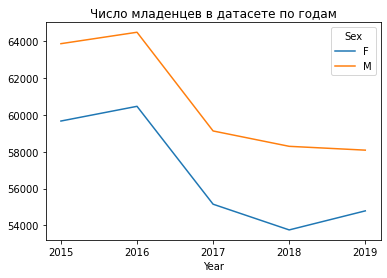

In [ ]:
#построим график с помощью matplotlib

total_births.T.plot(title = 'Число младенцев в датасете по годам', xticks = range(2015, 2020, 1))

#варианты графиков
#гистограмма hist 
#скаттерплот scatter

#параметры: xticks, ytricks, bins, color,  label и т.д.

In [ ]:
#Создадим функцию, которая будет делить число младенцев с каждым именем но сумму всех младенцев за год.
#И выведем таким образом долю для каждого имени, для каждого года.
#Для этого параметра создадим отдельный столбец

def add_prop(group):
  births = group.NumberOfPersons.astype(float)
  group['prop'] = births / births.sum()
  return group


df = df.groupby(['Year', 'Sex']).apply(add_prop)
df

,Name,Year,Sex,NumberOfPersons,prop
0,Аврора,2015,F,15,0.000251
1,Агата,2015,F,211,0.003536
2,Аглая,2015,F,50,0.000838
3,Агния,2015,F,141,0.002363
4,Адам,2015,M,188,0.002943
...,...,...,...,...,...
1473,Ян,2019,M,111,0.001911
1474,Яна,2019,F,324,0.005913
1475,Ярослав,2019,M,897,0.015442
1476,Ярослава,2019,F,132,0.002409


In [ ]:
#посмотрим на мальчиков
boys = df[df.sex == "M"]
boys

In [ ]:
#посмотрим на девочек
girls = df[df.Sex == 'F']
girls

In [ ]:
#сделаем еще одну сводную таблицу

total = df.pivot_table(values='NumberOfPersons', index='Year', columns='Name', aggfunc='sum')
total

Name,Аарон,Абдулла,Абдуллах,Абубакр,Аврора,Агата,Аглая,Агния,Адам,Аделина,...,Юсуф,Яков,Ян,Яна,Яромир,Ярослав,Ярослава,Ясмин,Ясмина,рослав
Year,,,,,,,,,,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,15.0,211.0,50.0,141.0,188.0,237.0,...,35.0,73.0,87.0,369.0,15.0,1197.0,250.0,7.0,173.0,NaN
2016,NaN,NaN,NaN,15.0,42.0,244.0,62.0,163.0,229.0,259.0,...,33.0,43.0,107.0,375.0,16.0,1086.0,202.0,NaN,227.0,108.0
2017,NaN,NaN,NaN,6.0,85.0,240.0,45.0,140.0,258.0,242.0,...,59.0,69.0,130.0,324.0,8.0,1014.0,189.0,NaN,191.0,NaN
2018,NaN,13.0,NaN,NaN,116.0,293.0,29.0,106.0,255.0,286.0,...,151.0,91.0,115.0,307.0,8.0,963.0,168.0,NaN,223.0,NaN
2019,8.0,19.0,30.0,7.0,160.0,365.0,41.0,96.0,315.0,294.0,...,108.0,57.0,111.0,324.0,NaN,897.0,132.0,NaN,252.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f434f78a510>,
      dtype=object)

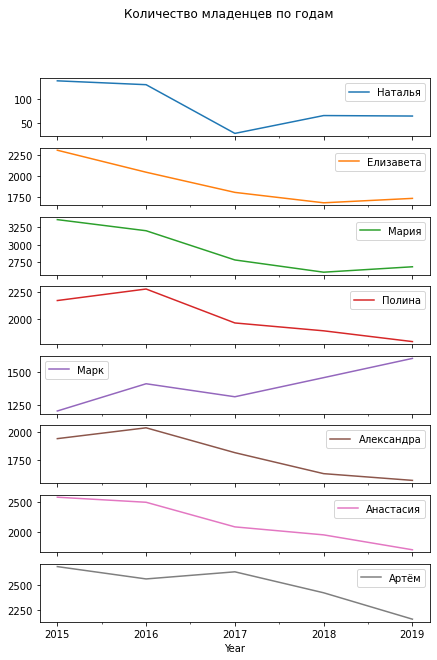

In [ ]:
#посмотрим на распространенность конкретных имен и динамику во времени

subset = total[['Наталья', 'Елизавета', 'Мария', 'Полина', 'Марк', 'Александра', 'Анастасия', 'Артём']]

subset.plot(subplots=True,figsize=(7, 10), grid=False, title="Количество младенцев по годам", xticks=range(2015, 2020, 1))

In [ ]:
alfia = df[df.Name == 'Наталья']
alfia

,Name,Year,Sex,NumberOfPersons,prop
201,Наталья,2015,F,138,0.002313
496,Наталья,2016,F,130,0.002150
800,Наталья,2017,F,29,0.000526
1101,Наталья,2018,F,66,0.001228
1387,Наталья,2019,F,65,0.001186


In [ ]:
#эта функция создает список из 10 самых распространенных имен для каждого года

def get_top10(group):
  return group.sort_values('NumberOfPersons', ascending=False)[:10]


grouped = df.groupby(['Year', 'Sex'])
top10 = grouped.apply(get_top10)


# Удалить групповой индекс, он больше не нужен
top10.reset_index(inplace=True, drop=True)

In [ ]:
top10[top10.Year == 2019]

,Name,Year,Sex,NumberOfPersons,prop
80,Мария,2019,F,2689,0.049077
81,Анна,2019,F,2549,0.046522
82,София,2019,F,2467,0.045026
83,Алиса,2019,F,2157,0.039368
84,Виктория,2019,F,2033,0.037105
85,Полина,2019,F,1788,0.032633
86,Елизавета,2019,F,1733,0.031629
87,Анастасия,2019,F,1700,0.031027
88,Ева,2019,F,1645,0.030023
89,Варвара,2019,F,1612,0.029421


In [ ]:
 table = top10.pivot_table(values='prop', index='Year', columns='Sex', aggfunc='sum')
 table

Sex,F,M
Year,,
2015,0.408801,0.376986
2016,0.394718,0.368814
2017,0.413958,0.374467
2018,0.382432,0.357851
2019,0.371831,0.358151


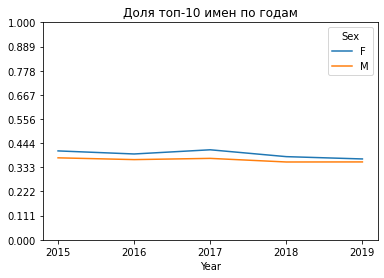

In [ ]:
table.plot(title='Доля топ-10 имен по годам', yticks=np.linspace(0, 1, 10), xticks=range(2015, 2020, 1))

In [ ]:
#срез по отдельному году

boys15 = boys[boys.Sex == 'M']

boys15[boys.Year == 2015]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,Name,Year,Sex,NumberOfPersons,prop
13,Александр,2015,M,3352,0.052477
15,Алексей,2015,M,1488,0.023295
38,Андрей,2015,M,1688,0.026427
53,Артём,2015,M,2686,0.042051
81,Владимир,2015,M,1342,0.021010
94,Даниил,2015,M,2121,0.033205
108,Дмитрий,2015,M,2294,0.035914
114,Егор,2015,M,1631,0.025534
127,Иван,2015,M,2660,0.041644
130,Илья,2015,M,1574,0.024642


In [ ]:
all_names = pd.Series(df.Name.unique())
men_women = all_names[all_names.str.lower().str.contains('алекс')]
men_women

12         Алекс
13     Александр
14    Александра
15       Алексей
dtype: object

In [ ]:
filtered = df[df.Name.isin(men_women)]
filtered.groupby('Name').NumberOfPersons.sum()

Name
Алекс            40
Александр     16064
Александра     8994
Алексей        6326
Name: NumberOfPersons, dtype: int64